# Midterm Exam Winter 2022

This midterm exam is an open-book, open-resource exam. However, you may not collaborate with anyone. Please send clarification questions and hint requests to me at [adrian.liu2@mcgill.ca](mailto:adrian.liu2@mcgill.ca). Submission instructions are below. The exam is due at 11:59:59 Eastern on February 24th, 2022.

You may copy and paste code from your previous assignments, but __you must cite your sources__. E.g., if you want to use a function that you wrote in Coding Lab 02, please include the comment "this function was copied from Coding Lab 02"

**There will be a few points available in questions 4 and 6 for good coding habits. For example, if there is a bit of code that you intend to reuse, define a function rather than copying and pasting it multiple times!**

## Question 1

I have created a ``git`` repo here: https://github.com/acliu/PHYS321_Midterm2022.git. In this repo there is an old ``git`` commit with the commit message "movie quote commit here". In that commit is a file called ``movie_quote.txt`` (which no longer exists in the current commit), and inside the file is a quote from a movie:
1. Retrieve this quote and write it down below.
2. Write down the ``git`` commands you used to clone the repo and the commands you used to help you retrieve the quote.

There are multiple ways to do this using ``git``. I am not picky about how you do this, as long as 1) you used the command line, and 2) it isn't "I went to the Github website and looked there".

## Your answer here
1. May the Force be with you 

2. 
``git clone https://github.com/acliu/PHYS321_Midterm2022.git``

``git log``

``git revert 23066d567dcbdf3d535186dc433da751476e139f``

``more movie_quote.txt``





## Question 2

Create a **new** repo on the ``github`` website and clone it. Do an initial commit of this Jupyter notebook locally on your command line and commit with the message "first commit of midterm". Do this now (because I will be looking for a commit in your history prior to your final submission). Push to your repo. Write down all the commands that you used on the command line to do this.

## Your answer here
``git clone https://github.com/wppqywq/PHYS321_mid.git``

``cd PHYS321_mid/``

``git add .``

``git commit -m "first commit of midterm"``

``git push origin main``

## Question 3

Note that although the answers to 3(a) and 3(c) can be found by Googling, to get full credit you will need to show how you can get the answer using code. 

__a)__ A few years ago people thought that the star Betelgeuse could go supernova. Where is Betelgeuse (in RA and DEC)?

In [100]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [101]:
ori_coord = SkyCoord.from_name('* alf Ori')
print(ori_coord)

<SkyCoord (ICRS): (ra, dec) in deg
    (88.79293899, 7.40706399)>


__b)__ Is Betelgeuse viewable from all parts of the northern hemisphere? Is it viewable from all parts of the southern hemisphere?

## Your answer here
As the rotation of earth itself, the Betelgeuse should be viewable at sometimes in a day from all parts of northern hemishpere.

It is viewable for most of the southern, except a small circle centered on the South Pole, due to the positive declination.

__c)__ Suppose Betelgeuse were to go supernova during March break. For roughly how many hours every night will it be in principle observable? (Assume that we have a telescope that can be see horizon-to-horizon, and neglect the fact that Sun can affect astronomical observations even when it is slightly below the horizon

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import EarthLocation, AltAz
from astropy.time import Time
from astropy.coordinates import get_sun

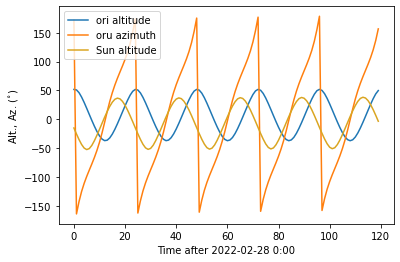

In [103]:
# this function was copied from Coding Lab 01.

McGill = EarthLocation(lat='45d30.29m', lon='-73d34.63m')
observing_time = Time('2022-02-28 0:00')
days = 5
delta_times = np.arange(24*days)*u.hour
times = observing_time + delta_times
ref_frame = AltAz(location=McGill, obstime=times)

alts = ori_coord.transform_to(ref_frame).alt
azs = ori_coord.transform_to(ref_frame).az
sun_alts = get_sun(times).transform_to(ref_frame).alt

# Get rid of the harsh chopping in azimuth by allowing negative azimuths
azs = np.array(azs)
azs[np.where(azs>180)] -= 360

plt.plot(delta_times+observing_time.datetime.hour*u.hour, alts, label='ori altitude')
plt.plot(delta_times+observing_time.datetime.hour*u.hour, azs, label='oru azimuth')
plt.plot(delta_times+observing_time.datetime.hour*u.hour, sun_alts, c='goldenrod', label='Sun altitude')

plt.ylim()
plt.xlabel('Time after 2022-02-28 0:00')
plt.ylabel(r'Alt., Az. ($^{\circ}$)')
plt.legend()
plt.show()

In [104]:
hours = 0
for i in range(len(alts)):
    if alts[i] >= 0 and sun_alts[i] < 0:
        hours += 1
hours = hours / 5
print('about %d observable hours every day'%hours )


about 8 observable hours every day


## answer
about 8 observable hours every day

## Question 4

Let's compare the Hubble Space Telescope (HST) to the recently launched (and soon operational!) James Webb Space Telescope (JWST).

__a)__ First we'll compare the sensitivity of these telescopes. HST is said to have a "limiting magnitude" $+31.5$ while JWST's is $+34$. Which telescope can see fainter things? By what factor? (In reality this is not an entirely fair comparison because HST and JWST observe at different wavelengths and are good at different types of science).

## Your answer here
As the larger the apparent magnetude, the dimmer is the object. The higher the limiting magnitude, the fainter things it can view.

Thus JWST can see fainter. 

By a facter of $100^{(34-31.5)/5} = 10$.

__b)__ Produce the following plots:
* The minimum luminosity of an object (expressed in absolute magnitudes) that can be seen by HST and JWST as a function of redshift $z$
* The same plots but with the luminosity expressed in units of the Solar luminosity $L_\odot$
* The previous two plots but as a function of distance rather than redshift.

Have your plots span $0 < z < 10$, and make sure the plots are visually easy to read. (Marks will be deducted if, for example, the trends cannot be easily seen because of inappropriate axis ranges).

In [105]:
from astropy.cosmology import Planck15
# here we use data of Plank15


/Users/yy/opt/anaconda3/lib/python3.8/site-packages/astropy/cosmology/core.py:1447: RuntimeWarning: divide by zero encountered in log10
  val = 5. * np.log10(abs(self.luminosity_distance(z).value)) + 25.0


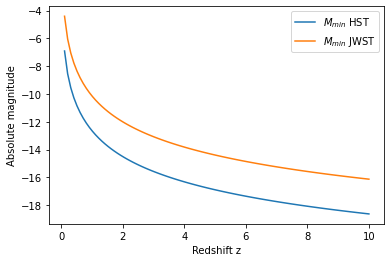

In [106]:
# The minimum luminosity (in absolute magnitudes) as a function of redshift z

z = np.linspace(0, 10, 100)
d = Planck15.distmod(z).value

M_HST = 31.5 - d
M_JWST = 34 - d

plt.plot(z, M_HST, label='$M_{min}$ HST')
plt.plot(z, M_JWST, label='$M_{min}$ JWST')
plt.xlabel('Redshift z')
plt.ylabel('Absolute magnitude')
plt.legend()
plt.show()

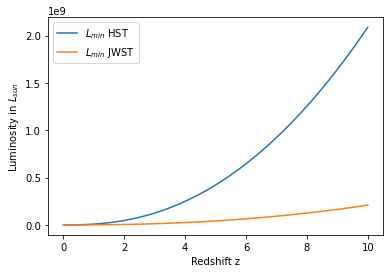

In [107]:
# the luminosity expressed in units of the Solar luminosity

M_sun = 4.67
L_HST = 100**(-(M_HST - M_sun)/5)
L_JWST = 100**(-(M_JWST - M_sun)/5)

plt.plot(z, L_HST, label='$L_{min}$ HST')
plt.plot(z, L_JWST, label='$L_{min}$ JWST')
plt.xlabel('Redshift z')
plt.ylabel('Luminosity in $L_{sun}$')
plt.legend()
plt.show()

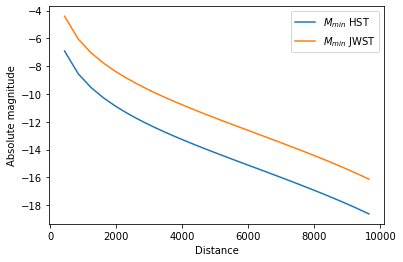

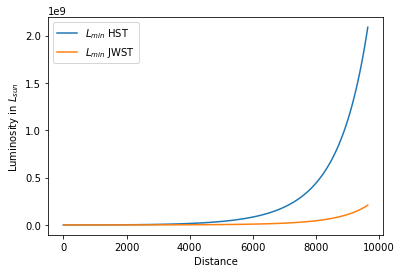

In [108]:
# plot with a function of distance rather than redshift

# comoving distance
D = Planck15.comoving_distance(z) 

#Plot as a function of D
plt.plot(D, M_HST, label='$M_{min}$ HST')
plt.plot(D, M_JWST, label='$M_{min}$ JWST')
plt.xlabel('Distance')
plt.ylabel('Absolute magnitude')
plt.legend()
plt.show()

plt.plot(D, L_HST, label='$L_{min}$ HST')
plt.plot(D, L_JWST, label='$L_{min}$ JWST')
plt.xlabel('Distance')
plt.ylabel('Luminosity in $L_{sun}$')
plt.legend()
plt.show()

__c)__ Suppose we lived in a (fake) universe that contained only three types of galaxies, each of which have an exact well-defined luminosity:
* Type A galaxies that have luminosity $L = 10^{8}L_\odot$. These galaxies have a number density of $10^{-2}$ per comoving Mpc$^{3}$.
* Type B galaxies that have luminosity $L = 10^{10}L_\odot$. These galaxies have a number density of $5 \times 10^{-2}$ per comoving Mpc$^{3}$.
* Type C galaxies that have luminosity $L = 10^{12}L_\odot$. These galaxies have a number density of $10^{-3}$ per comoving Mpc$^{3}$.

Now imagine (completely unrealistically) that we get to use HST and JWST to perform a galaxy survey over the entire sky. How many of each galaxy type should I expect to find?

In [109]:

# some of the code from Coding Lab 04

def vol(m, L):
    ''' func to calc v_survey of the two telescopes
    m: limiting magnitude for each telescope
    L: luminosity of each galaxy
    '''
    M = M_sun - 5 * np.log(L)/2
    d_Mmax = 10 * 10**((m - M)/5)
    d_Mmax = d_Mmax * 10**(-6)    # use Mpc

    # 0.93 - spectroscopic completeness correction
    ccm = 0.93
    solid_anglem = 4.*np.pi *0.195
    # comoving survey volume assuming flat cosmology
    vsurvey = ccm * solid_anglem / 3. * (np.power(d_Mmax,3.0))

    return vsurvey

galaxies = [['A', 10**8, 10**(-2)],
               ['B', 10**10, 5*10**(-2)],
               ['C', 10**12, 10**(-3)]]
for i in range(len(galaxies)):
    vol_HST = vol(31.5, galaxies[i][1])
    num_HST = vol_HST * galaxies[i][2]
    vol_JWST = vol(34, galaxies[i][1])
    num_JWST = vol_JWST * galaxies[i][2]
    print('num of galaxy %s can be observed in HST is %s'%(galaxies[i][0], num_HST))
    print('num of galaxy %s can be observed in JWST is %s'%(galaxies[i][0], num_JWST))



num of galaxy A can be observed in HST is 4.070308109067967e+26
num of galaxy A can be observed in JWST is 1.2871444403307827e+28
num of galaxy B can be observed in HST is 1.6457071972553666e+34
num of galaxy B can be observed in JWST is 5.204183105058965e+35
num of galaxy C can be observed in HST is 2.661569695978831e+39
num of galaxy C can be observed in JWST is 8.416622390575003e+40


## Question 5

Note that this question is designed to be a little bit more open-ended than the others. You will need to explain your answer **in addition** to performing some simple calculations.

I am interested in designing a spam filter that decides if an email is suspicious or not by looking for various key words. Would the word "free" be a good one to use? Support your answer with a calculation. Feel free to collect some data from your own inbox! If the word "free" is an effective one to use, what would be an example of an ineffective word? And why would it be ineffective? If you decide that "free" is ineffective, give an example of a better choice. In both cases, explain why. (Ideally with some numerical examples).

## Your answer here
Let's say the the word 'free' is effective if $P(spam | 'free') >= 95\%$, thus only 5% of useful emails can be miss.

data: $P('free')$ is the data we collected, let's say n out of 100 emails contain 'free', then $P('free')=n%$.

prior: $P(spam)$ is a perdiction of percentage of your spam emails.

likelihood: is to decided how many of spam emails contain 'free'
\begin{equation}
P('free' | spam) = P('free' \cap spam)/P(spam)
\end{equation}
where $P('free' \cap spam)$ can be collected in the data.

then we have our posterior: 
\begin{equation}
P(spam | 'free') = \frac{P('free' | spam) P(spam)}{P('free')}
\end{equation}


## Question 6

Tony and Stephen are selling cakes on rue Sherbrooke. Their boss, Carol, has noticed that the number of cakes they sell per hour is well-modelled by a Poisson distribution. That is, if $n$ is a random variable signifying the number of cakes sold in an hour, the probability distribution $p(n)$ is given by

\begin{equation}
p(n) = \frac{e^{-\lambda} \lambda^n}{n!}
\end{equation}

Carol has noticed, however, that the mean number of cakes sold per hour is different for her two salespeople. In other words, $\lambda_\textrm{tony} \neq \lambda_\textrm{stephen}$. Through years of observations, she has determined that $\lambda_\textrm{tony} = 5$ and $\lambda_\textrm{stephen} = 8$.

Today, Stephen worked for 6 hours and claimed that he sold $6$, $6$, $8$, $8$, $6$, $8$ cakes (each number represents the number of cakes sold in an hour). These numbers are kinda low for Stephen, so Carol confronts him and asks him if Tony had secretly substituted for him. Stephen objects. He says that there are always random fluctuations, and that he'll really need to see a rigorous statistical analysis.

Carol turns to you for help, asking you to use your Bayesian inference skills to help her out. Can you help her? Do you think Tony substituted for Stephen? How confident are you in your conclusion?

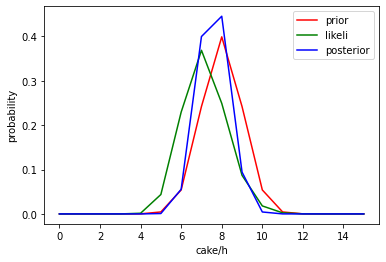

In [110]:
# likelihood: p(data | lambda)
def poisson(n, lamb):
    return np.exp(-lamb) * lamb**n / np.math.factorial(n)
def likeli(lamb, n=[6,6,8,8,6,8]):
    f = lambda x: np.prod([poisson(i, x) for i in n])
    fl = [f(i) for i in lamb]
    return fl / sum(fl)

# prior: p(x=lambda) using normal dist
def normal(x, x0=8, sigma=1):
    fx = (np.exp(-(x-x0)**2 / (2*sigma**2)) / np.sqrt(2*np.pi*sigma**2))
    fx = fx / np.sum(fx)     # normalize
    return fx

# posterior(lambda | data)
def posterior(n):
    f = [i*j for i,j in zip(normal(n), likeli(n))]
    return f/sum(f)


x = np.linspace(0, 15, 16)
prior_x = normal(x)
likeli_x = likeli(x)
posterior_x = posterior(x)

plt.plot(x, prior_x, 'r', label='prior')
plt.plot(x, likeli_x, 'g', label = 'likeli')
plt.plot(x, posterior_x, 'b', label='posterior')
plt.xlabel('cake/h')
plt.ylabel('probability')
plt.legend()
plt.show()

In [111]:
print('probability for stephen working for the data is ', posterior_x[8])
print('probability for tom working for the data is ', posterior_x[5])
print('probability for stephen is %d times of tom\'s '%(posterior_x[8]/posterior_x[5]))


probability for stephen working for the data is  0.4453617965271236
probability for tom working for the data is  0.0008682588013042082
probability for stephen is 512 times of tom's 


## Answer
I believe this data come from stephen. As the probability of stephen is 512 times greater than tom.

## Ungraded question

I would like to tailor the last third of the course to your interests, as well as to get your overall feedback on things. Please fill out [this](https://forms.gle/Sy4Lf6QVdYdUA23a6) anonymous survey to help me with that. This is not a graded part of your midterm, but now is just a convenient time to do it.

## Submission

You're done! Do a final git commit, taking care to include everything relevant (e.g., if you created a new ``tools.py`` file, be sure to include it). If you decide to revise your answers before the deadline, no problem---just make the changes you want to make and resubmit your work. Push your work to your repo, and send me an invitation to the repo (my Github username is acliu)